In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [26]:
def dict_size(dict):
    total_count = sum(len(values) for values in dict.values())
    print(total_count)

# Accuracy Functions

In [27]:
def CDcheck_accuracy(csv_path, dictionary):

    normalized_dict = {key.lower(): [value.lower() for value in values] for key, values in dictionary.items()}

    # Create a reverse lookup dictionary
    reverse_dict = {}
    for key, values in normalized_dict.items():
        for value in values:
            reverse_dict[value] = key  # Map all variations to the primary key

    data = pd.read_csv(csv_path, header=None, names=['file_path', 'label'])

    data['label'] = data['label'].str.strip().str.lower()

    count = 0
    total = 0

    for index, row in data.iterrows():

        path_parts = row['file_path'].split('/')
        if len(path_parts) > 2:
            if any(char.isupper() for char in path_parts[-1]):
                name = 'cat'
            else:
                name = 'dog'

            # Find the primary key for the label using the reverse lookup dictionary
            primary_key = reverse_dict.get(row['label'], None)

            if primary_key and name in normalized_dict[primary_key]:
                count += 1
        total += 1

    accuracy = count / total if total > 0 else 0
    return round(accuracy * 100, 2)

In [28]:
def aObase_accuracy(csv_path):

    data = pd.read_csv(csv_path, header=None, names=['file_path', 'label'])

    # Strip and convert labels to lowercase
    data['label'] = data['label'].str.strip().str.lower()

    count = 0
    total = 0

    for index, row in data.iterrows():

        path_parts = row['file_path'].split('/')
        if len(path_parts) > 2:
            vehicle_name = path_parts[-2].strip().lower()  

            # Check if the label and vehicle name match in the dictionary
            if row['label'] == vehicle_name:
                count += 1
        total += 1

    accuracy = count / total if total > 0 else 0
    return round(accuracy * 100, 2)

In [29]:
def card_accuracy(csv_path, acc_dict):
    data = pd.read_csv(csv_path, header=None, names=['file_path', 'label'])

    # Normalize labels
    data['label'] = data['label'].str.strip().str.lower()

    # Normalize the dictionary keys and values
    normalized_dict = {key.lower(): [v.lower() for v in values] for key, values in acc_dict.items()}

    count = 0
    total = 0

    for index, row in data.iterrows():
        path_parts = row['file_path'].split('/')

        if len(path_parts) > 2:
            vehicle_key = path_parts[-2].strip().lower()  # Extract key from [-2]
            label = row['label']

            # Find a matching key in the dictionary
            matched_key = next((key for key in normalized_dict if key in vehicle_key), None)

            if matched_key:
                # Check if the label matches any of the values for the matched key
                if any(value in label for value in normalized_dict[matched_key]):
                    count += 1
        total += 1

    accuracy = count / total if total > 0 else 0
    return round(accuracy * 100, 2)


In [30]:
def aOcheck_accuracy(csv_path, dictionary):

    normalized_dict = {key.lower(): [value.lower() for value in values] for key, values in dictionary.items()}

    # Create a reverse lookup dictionary
    reverse_dict = {}
    for key, values in normalized_dict.items():
        for value in values:
            reverse_dict[value] = key  # Map all variations to the primary key

    data = pd.read_csv(csv_path, header=None, names=['file_path', 'label'])

    data['label'] = data['label'].str.strip().str.lower()

    count = 0
    total = 0

    for index, row in data.iterrows():

        path_parts = row['file_path'].split('/')
        if len(path_parts) > 2:
            name = path_parts[-2].strip().lower()  # Normalize name

            # Find the primary key for the label using the reverse lookup dictionary
            primary_key = reverse_dict.get(row['label'], None)

            if primary_key and name in normalized_dict[primary_key]:
                count += 1
        total += 1

    accuracy = count / total if total > 0 else 0
    return round(accuracy * 100, 2)

# Dictionaries

## Animal 4

In [31]:
dict_8 = {
    "Buffalo": ["Buffalo", "Buffaloes"],
    "Elephant": ["Elephant", "Elephants"],
    "Rhino": ["Rhino", "Rhinoceros"],
    "Zebra": ["Zebra", "Zebras"],
}

#Buffalo,Buffaloes,Elephant,Elephants,Rhino,Rhinoceros,Zebra,Zebras

dict_size(dict_8)
print(aOcheck_accuracy("animalOther/AO8.csv", dict_8))

8
96.73


In [32]:
dict_12 = {
    "Buffalo": ["Buffalo", "Buffaloes", "Picture of Buffalo"],
    "Elephant": ["Elephant", "Elephants", "Picture of Elephant"],
    "Rhino": ["Rhino", "Rhinoceros", "Picture of Rhino"],
    "Zebra": ["Zebra", "Zebras", "Picture of Zebra"],
}

# Buffalo, Buffaloes, Picture of Buffalo, Elephant, Elephants, Picture of Elephant, Rhino, Rhinoceros, Picture of Rhino, Zebra, Zebras, Picture of Zebra

dict_size(dict_12)
print(aOcheck_accuracy("animalOther/AO12.csv", dict_12))


12
95.53


In [33]:
dict_16 = {
    "Buffalo": ["Buffalo", "Buffaloes", "Picture of Buffalo", "Image of Buffalo"],
    "Elephant": ["Elephant", "Elephants", "Picture of Elephant", "Image of Elephant"],
    "Rhino": ["Rhino", "Rhinoceros", "Picture of Rhino", "Image of Rhino"],
    "Zebra": ["Zebra", "Zebras", "Picture of Zebra", "Image of Zebra"],
}

# Buffalo, Buffaloes, Picture of Buffalo, Image of Buffalo, Elephant, Elephants, Picture of Elephant, Image of Elephant, Rhino, Rhinoceros, Picture of Rhino, Image of Rhino, Zebra, Zebras, Picture of Zebra, Image of Zebra

dict_size(dict_16)
print(aOcheck_accuracy("animalOther/AO16.csv", dict_16))


16
96.45


In [34]:
dict_20 = {
    "Buffalo": ["Buffalo", "Buffaloes", "Picture of Buffalo", "Image of Buffalo", "Wild Buffalo"],
    "Elephant": ["Elephant", "Elephants", "Picture of Elephant", "Image of Elephant", "Wild Elephant"],
    "Rhino": ["Rhino", "Rhinoceros", "Picture of Rhino", "Image of Rhino", "Wild Rhino"],
    "Zebra": ["Zebra", "Zebras", "Picture of Zebra", "Image of Zebra", "Wild Zebra"],
}

# Buffalo, Buffaloes, Picture of Buffalo, Image of Buffalo, Wild Buffalo, Elephant, Elephants, Picture of Elephant, Image of Elephant, Wild Elephant, Rhino, Rhinoceros, Picture of Rhino, Image of Rhino, Wild Rhino, Zebra, Zebras, Picture of Zebra, Image of Zebra, Wild Zebra

dict_size(dict_20)
print(aOcheck_accuracy("animalOther/AO20.csv", dict_20))


20
96.93


In [35]:
dict_24 = {
    "Buffalo": ["Buffalo", "Buffaloes", "Picture of Buffalo", "Image of Buffalo", "Wild Buffalo", "Buffalo Herd"],
    "Elephant": ["Elephant", "Elephants", "Picture of Elephant", "Image of Elephant", "Wild Elephant", "Elephant Herd"],
    "Rhino": ["Rhino", "Rhinoceros", "Picture of Rhino", "Image of Rhino", "Wild Rhino", "Rhino Herd"],
    "Zebra": ["Zebra", "Zebras", "Picture of Zebra", "Image of Zebra", "Wild Zebra", "Zebra Herd"],
}

# Buffalo, Buffaloes, Picture of Buffalo, Image of Buffalo, Wild Buffalo, Buffalo Herd, Elephant, Elephants, Picture of Elephant, Image of Elephant, Wild Elephant, Elephant Herd, Rhino, Rhinoceros, Picture of Rhino, Image of Rhino, Wild Rhino, Rhino Herd, Zebra, Zebras, Picture of Zebra, Image of Zebra, Wild Zebra, Zebra Herd

dict_size(dict_24)
print(aOcheck_accuracy("animalOther/AO24.csv", dict_24))


24
96.93


In [36]:
dict_32 = {
    "Buffalo": ["Buffalo", "Buffaloes", "Picture of Buffalo", "Image of Buffalo", "Wild Buffalo", "Buffalo Herd", "African Buffalo", "Buffalo in the Wild"],
    "Elephant": ["Elephant", "Elephants", "Picture of Elephant", "Image of Elephant", "Wild Elephant", "Elephant Herd", "African Elephant", "Elephant in the Wild"],
    "Rhino": ["Rhino", "Rhinoceros", "Picture of Rhino", "Image of Rhino", "Wild Rhino", "Rhino Herd", "African Rhino", "Rhino in the Wild"],
    "Zebra": ["Zebra", "Zebras", "Picture of Zebra", "Image of Zebra", "Wild Zebra", "Zebra Herd", "African Zebra", "Zebra in the Wild"],
}

# Buffalo, Buffaloes, Picture of Buffalo, Image of Buffalo, Wild Buffalo, Buffalo Herd, African Buffalo, Buffalo in the Wild, Elephant, Elephants, Picture of Elephant, Image of Elephant, Wild Elephant, Elephant Herd, African Elephant, Elephant in the Wild, Rhino, Rhinoceros, Picture of Rhino, Image of Rhino, Wild Rhino, Rhino Herd, African Rhino, Rhino in the Wild, Zebra, Zebras, Picture of Zebra, Image of Zebra, Wild Zebra, Zebra Herd, African Zebra, Zebra in the Wild

dict_size(dict_32)
print(aOcheck_accuracy("animalOther/AO32.csv", dict_32))


32
98.88


In [37]:
dict_36 = {
    "Buffalo": ["Buffalo", "Buffaloes", "Picture of Buffalo", "Image of Buffalo", "Wild Buffalo", "Buffalo Herd", "African Buffalo", "Buffalo in the Wild", "Large Buffalo"],
    "Elephant": ["Elephant", "Elephants", "Picture of Elephant", "Image of Elephant", "Wild Elephant", "Elephant Herd", "African Elephant", "Elephant in the Wild", "Large Elephant"],
    "Rhino": ["Rhino", "Rhinoceros", "Picture of Rhino", "Image of Rhino", "Wild Rhino", "Rhino Herd", "African Rhino", "Rhino in the Wild", "Large Rhino"],
    "Zebra": ["Zebra", "Zebras", "Picture of Zebra", "Image of Zebra", "Wild Zebra", "Zebra Herd", "African Zebra", "Zebra in the Wild", "Large Zebra"],
}

# Buffalo, Buffaloes, Picture of Buffalo, Image of Buffalo, Wild Buffalo, Buffalo Herd, African Buffalo, Buffalo in the Wild, Large Buffalo, Elephant, Elephants, Picture of Elephant, Image of Elephant, Wild Elephant, Elephant Herd, African Elephant, Elephant in the Wild, Large Elephant, Rhino, Rhinoceros, Picture of Rhino, Image of Rhino, Wild Rhino, Rhino Herd, African Rhino, Rhino in the Wild, Large Rhino, Zebra, Zebras, Picture of Zebra, Image of Zebra, Wild Zebra, Zebra Herd, African Zebra, Zebra in the Wild, Large Zebra

dict_size(dict_36)
print(aOcheck_accuracy("animalOther/AO36.csv", dict_36))


36
98.9


In [38]:
dict_40 = {
    "Buffalo": ["Buffalo", "Buffaloes", "Picture of Buffalo", "Image of Buffalo", "Wild Buffalo", "Buffalo Herd", "African Buffalo", "Buffalo in the Wild", "Large Buffalo", "Buffalo Plains"],
    "Elephant": ["Elephant", "Elephants", "Picture of Elephant", "Image of Elephant", "Wild Elephant", "Elephant Herd", "African Elephant", "Elephant in the Wild", "Large Elephant", "Elephant Plains"],
    "Rhino": ["Rhino", "Rhinoceros", "Picture of Rhino", "Image of Rhino", "Wild Rhino", "Rhino Herd", "African Rhino", "Rhino in the Wild", "Large Rhino", "Rhino Plains"],
    "Zebra": ["Zebra", "Zebras", "Picture of Zebra", "Image of Zebra", "Wild Zebra", "Zebra Herd", "African Zebra", "Zebra in the Wild", "Large Zebra", "Zebra Plains"],
}

# Buffalo, Buffaloes, Picture of Buffalo, Image of Buffalo, Wild Buffalo, Buffalo Herd, African Buffalo, Buffalo in the Wild, Large Buffalo, Buffalo Plains, Elephant, Elephants, Picture of Elephant, Image of Elephant, Wild Elephant, Elephant Herd, African Elephant, Elephant in the Wild, Large Elephant, Elephant Plains, Rhino, Rhinoceros, Picture of Rhino, Image of Rhino, Wild Rhino, Rhino Herd, African Rhino, Rhino in the Wild, Large Rhino, Rhino Plains, Zebra, Zebras, Picture of Zebra, Image of Zebra, Wild Zebra, Zebra Herd, African Zebra, Zebra in the Wild, Large Zebra, Zebra Plains

dict_size(dict_40)
print(aOcheck_accuracy("animalOther/AO40.csv", dict_40))


40
98.9


In [39]:
dict_44 = {#problem
    "Buffalo": ["Buffalo", "Buffaloes", "Picture of Buffalo", "Image of Buffalo", "Wild Buffalo", "Buffalo Herd", "African Buffalo", "Buffalo in the Wild", "Large Buffalo", "Buffalo Plains", "Moving Buffalo"],
    "Elephant": ["Elephant", "Elephants", "Picture of Elephant", "Image of Elephant", "Wild Elephant", "Elephant Herd", "African Elephant", "Elephant in the Wild", "Large Elephant", "Elephant Plains", "Moving Elephant"],
    "Rhino": ["Rhino", "Rhinoceros", "Picture of Rhino", "Image of Rhino", "Wild Rhino", "Rhino Herd", "African Rhino", "Rhino in the Wild", "Large Rhino", "Rhino Plains", "Moving Rhino"],
    "Zebra": ["Zebra", "Zebras", "Picture of Zebra", "Image of Zebra", "Wild Zebra", "Zebra Herd", "African Zebra", "Zebra in the Wild", "Large Zebra", "Zebra Plains", "Moving Zebra"],
}

# Buffalo, Buffaloes, Picture of Buffalo, Image of Buffalo, Wild Buffalo, Buffalo Herd, African Buffalo, Buffalo in the Wild, Large Buffalo, Buffalo Plains, Moving Buffalo, Elephant, Elephants, Picture of Elephant, Image of Elephant, Wild Elephant, Elephant Herd, African Elephant, Elephant in the Wild, Large Elephant, Elephant Plains, Moving Elephant, Rhino, Rhinoceros, Picture of Rhino, Image of Rhino, Wild Rhino, Rhino Herd, African Rhino, Rhino in the Wild, Large Rhino, Rhino Plains, Moving Rhino, Zebra, Zebras, Picture of Zebra, Image of Zebra, Wild Zebra, Zebra Herd, African Zebra, Zebra in the Wild, Large Zebra, Zebra Plains, Moving Zebra

dict_size(dict_44)
print(aOcheck_accuracy("animalOther/AO44.csv", dict_44))


44
98.9


In [40]:
dict_48 = {
    "Buffalo": ["Buffalo", "Buffaloes", "Picture of Buffalo", "Image of Buffalo", "Wild Buffalo", "Buffalo Herd", "African Buffalo", "Buffalo in the Wild", "Large Buffalo", "Buffalo Plains", "Moving Buffalo", "American Buffalo"],
    "Elephant": ["Elephant", "Elephants", "Picture of Elephant", "Image of Elephant", "Wild Elephant", "Elephant Herd", "African Elephant", "Elephant in the Wild", "Large Elephant", "Elephant Plains", "Moving Elephant", "Asian Elephant"],
    "Rhino": ["Rhino", "Rhinoceros", "Picture of Rhino", "Image of Rhino", "Wild Rhino", "Rhino Herd", "African Rhino", "Rhino in the Wild", "Large Rhino", "Rhino Plains", "Moving Rhino", "Black Rhino"],
    "Zebra": ["Zebra", "Zebras", "Picture of Zebra", "Image of Zebra", "Wild Zebra", "Zebra Herd", "African Zebra", "Zebra in the Wild", "Large Zebra", "Zebra Plains", "Moving Zebra", "Wild Plains Zebra"],
}

# Buffalo, Buffaloes, Picture of Buffalo, Image of Buffalo, Wild Buffalo, Buffalo Herd, African Buffalo, Buffalo in the Wild, Large Buffalo, Buffalo Plains, Moving Buffalo, American Buffalo, Elephant, Elephants, Picture of Elephant, Image of Elephant, Wild Elephant, Elephant Herd, African Elephant, Elephant in the Wild, Large Elephant, Elephant Plains, Moving Elephant, Asian Elephant, Rhino, Rhinoceros, Picture of Rhino, Image of Rhino, Wild Rhino, Rhino Herd, African Rhino, Rhino in the Wild, Large Rhino, Rhino Plains, Moving Rhino, Black Rhino, Zebra, Zebras, Picture of Zebra, Image of Zebra, Wild Zebra, Zebra Herd, African Zebra, Zebra in the Wild, Large Zebra, Zebra Plains, Moving Zebra, Wild Plains Zebra

dict_size(dict_48)
print(aOcheck_accuracy("animalOther/AO48.csv", dict_48))


48
98.9


In [41]:
dict_52 = {
    "Buffalo": ["Buffalo", "Buffaloes", "Picture of Buffalo", "Image of Buffalo", "Wild Buffalo", "Buffalo Herd", "African Buffalo", "Buffalo in the Wild", "Large Buffalo", "Buffalo Plains", "Moving Buffalo", "American Buffalo", "Buffalo in Herds"],
    "Elephant": ["Elephant", "Elephants", "Picture of Elephant", "Image of Elephant", "Wild Elephant", "Elephant Herd", "African Elephant", "Elephant in the Wild", "Large Elephant", "Elephant Plains", "Moving Elephant", "Asian Elephant", "Elephant in Herds"],
    "Rhino": ["Rhino", "Rhinoceros", "Picture of Rhino", "Image of Rhino", "Wild Rhino", "Rhino Herd", "African Rhino", "Rhino in the Wild", "Large Rhino", "Rhino Plains", "Moving Rhino", "Black Rhino", "Rhino in Herds"],
    "Zebra": ["Zebra", "Zebras", "Picture of Zebra", "Image of Zebra", "Wild Zebra", "Zebra Herd", "African Zebra", "Zebra in the Wild", "Large Zebra", "Zebra Plains", "Moving Zebra", "Wild Plains Zebra", "Zebra in Herds"],
}

# Buffalo, Buffaloes, Picture of Buffalo, Image of Buffalo, Wild Buffalo, Buffalo Herd, African Buffalo, Buffalo in the Wild, Large Buffalo, Buffalo Plains, Moving Buffalo, American Buffalo, Buffalo in Herds, Elephant, Elephants, Picture of Elephant, Image of Elephant, Wild Elephant, Elephant Herd, African Elephant, Elephant in the Wild, Large Elephant, Elephant Plains, Moving Elephant, Asian Elephant, Elephant in Herds, Rhino, Rhinoceros, Picture of Rhino, Image of Rhino, Wild Rhino, Rhino Herd, African Rhino, Rhino in the Wild, Large Rhino, Rhino Plains, Moving Rhino, Black Rhino, Rhino in Herds, Zebra, Zebras, Picture of Zebra, Image of Zebra, Wild Zebra, Zebra Herd, African Zebra, Zebra in the Wild, Large Zebra, Zebra Plains, Moving Zebra, Wild Plains Zebra, Zebra in Herds

dict_size(dict_52)
print(aOcheck_accuracy("animalOther/AO52.csv", dict_52))


52
98.9


In [42]:
dict_56 = {
    "Buffalo": [
        "Buffalo", "Buffaloes", "Picture of Buffalo", "Image of Buffalo", "Wild Buffalo", "Buffalo Herd",
        "African Buffalo", "Buffalo in the Wild", "Large Buffalo", "Buffalo Plains", "Moving Buffalo",
        "American Buffalo", "Buffalo in Herds", "Savannah Buffalo"
    ],
    "Elephant": [
        "Elephant", "Elephants", "Picture of Elephant", "Image of Elephant", "Wild Elephant", "Elephant Herd",
        "African Elephant", "Elephant in the Wild", "Large Elephant", "Elephant Plains", "Moving Elephant",
        "Asian Elephant", "Elephant in Herds", "Savannah Elephant"
    ],
    "Rhino": [
        "Rhino", "Rhinoceros", "Picture of Rhino", "Image of Rhino", "Wild Rhino", "Rhino Herd",
        "African Rhino", "Rhino in the Wild", "Large Rhino", "Rhino Plains", "Moving Rhino",
        "Black Rhino", "Rhino in Herds", "Savannah Rhino"
    ],
    "Zebra": [
        "Zebra", "Zebras", "Picture of Zebra", "Image of Zebra", "Wild Zebra", "Zebra Herd",
        "African Zebra", "Zebra in the Wild", "Large Zebra", "Zebra Plains", "Moving Zebra",
        "Wild Plains Zebra", "Zebra in Herds", "Savannah Zebra"
    ],
}

# Buffalo, Buffaloes, Picture of Buffalo, Image of Buffalo, Wild Buffalo, Buffalo Herd, African Buffalo, Buffalo in the Wild, Large Buffalo, Buffalo Plains, Moving Buffalo, American Buffalo, Buffalo in Herds, Savannah Buffalo, Elephant, Elephants, Picture of Elephant, Image of Elephant, Wild Elephant, Elephant Herd, African Elephant, Elephant in the Wild, Large Elephant, Elephant Plains, Moving Elephant, Asian Elephant, Elephant in Herds, Savannah Elephant, Rhino, Rhinoceros, Picture of Rhino, Image of Rhino, Wild Rhino, Rhino Herd, African Rhino, Rhino in the Wild, Large Rhino, Rhino Plains, Moving Rhino, Black Rhino, Rhino in Herds, Savannah Rhino, Zebra, Zebras, Picture of Zebra, Image of Zebra, Wild Zebra, Zebra Herd, African Zebra, Zebra in the Wild, Large Zebra, Zebra Plains, Moving Zebra, Wild Plains Zebra, Zebra in Herds, Savannah Zebra

dict_size(dict_56)
print(aOcheck_accuracy("animalOther/AO56.csv", dict_56))


56
98.93


In [43]:
dict_60 = {
    "Buffalo": [
        "Buffalo", "Buffaloes", "Picture of Buffalo", "Image of Buffalo", "Wild Buffalo", "Buffalo Herd",
        "African Buffalo", "Buffalo in the Wild", "Large Buffalo", "Buffalo Plains", "Moving Buffalo",
        "American Buffalo", "Buffalo in Herds", "Savannah Buffalo", "Horned Buffalo"
    ],
    "Elephant": [
        "Elephant", "Elephants", "Picture of Elephant", "Image of Elephant", "Wild Elephant", "Elephant Herd",
        "African Elephant", "Elephant in the Wild", "Large Elephant", "Elephant Plains", "Moving Elephant",
        "Asian Elephant", "Elephant in Herds", "Savannah Elephant", "Tusker Elephant"
    ],
    "Rhino": [
        "Rhino", "Rhinoceros", "Picture of Rhino", "Image of Rhino", "Wild Rhino", "Rhino Herd",
        "African Rhino", "Rhino in the Wild", "Large Rhino", "Rhino Plains", "Moving Rhino",
        "Black Rhino", "Rhino in Herds", "Savannah Rhino", "Horned Rhino"
    ],
    "Zebra": [
        "Zebra", "Zebras", "Picture of Zebra", "Image of Zebra", "Wild Zebra", "Zebra Herd",
        "African Zebra", "Zebra in the Wild", "Large Zebra", "Zebra Plains", "Moving Zebra",
        "Wild Plains Zebra", "Zebra in Herds", "Savannah Zebra", "Mountain Zebra"
    ],
}

# Buffalo, Buffaloes, Picture of Buffalo, Image of Buffalo, Wild Buffalo, Buffalo Herd, African Buffalo, Buffalo in the Wild, Large Buffalo, Buffalo Plains, Moving Buffalo, American Buffalo, Buffalo in Herds, Savannah Buffalo, Horned Buffalo, Elephant, Elephants, Picture of Elephant, Image of Elephant, Wild Elephant, Elephant Herd, African Elephant, Elephant in the Wild, Large Elephant, Elephant Plains, Moving Elephant, Asian Elephant, Elephant in Herds, Savannah Elephant, Tusker Elephant, Rhino, Rhinoceros, Picture of Rhino, Image of Rhino, Wild Rhino, Rhino Herd, African Rhino, Rhino in the Wild, Large Rhino, Rhino Plains, Moving Rhino, Black Rhino, Rhino in Herds, Savannah Rhino, Horned Rhino, Zebra, Zebras, Picture of Zebra, Image of Zebra, Wild Zebra, Zebra Herd, African Zebra, Zebra in the Wild, Large Zebra, Zebra Plains, Moving Zebra, Wild Plains Zebra, Zebra in Herds, Savannah Zebra, Mountain Zebra

dict_size(dict_60)
print(aOcheck_accuracy("animalOther/AO60.csv", dict_60))


60
98.95


## CatDog

In [44]:
CDdict2 = {
        'cat': ['cat'],
        'dog': ['dog']
    }


In [45]:
CDdict4 = { 
    'cat': ['cat', 'picture of cat'],
    'dog': ['dog', 'picture of dog']
}

In [46]:
CDdict6 = { 
    'cat': ['cat', 'picture of cat', 'cats'],
    'dog': ['dog', 'picture of dog', 'dogs']
}


In [47]:
CDdict8 = { 
    'cat': ['cat', 'picture of cat', 'cats', 'image of cats'],
    'dog': ['dog', 'picture of dog', 'dogs', 'image of dogs']
}


In [48]:
CDdict10 = { 
    'cat': ['cat', 'picture of cat', 'cats', 'image of cats', 'moving cat'],
    'dog': ['dog', 'picture of dog', 'dogs', 'image of dogs', 'moving dog']
}

In [49]:
CDdict12 = { 
    'cat': ['cat', 'picture of cat', 'cats', 'image of cats', 'moving cat', 'cat picture'],
    'dog': ['dog', 'picture of dog', 'dogs', 'image of dogs', 'moving dog', 'dog picture']
}

In [50]:
CDdict14 = { 
    'cat': ['cat', 'picture of cat', 'cats', 'image of cats', 'moving cat', 'cat picture', 'cat image'],
    'dog': ['dog', 'picture of dog', 'dogs', 'image of dogs', 'moving dog', 'dog picture', 'dog image']
}


In [51]:
CDdict16 = { 
    'cat': ['cat', 'picture of cat', 'cats', 'image of cats', 'moving cat', 'cat picture', 'cat image', 'cool cat'],
    'dog': ['dog', 'picture of dog', 'dogs', 'image of dogs', 'moving dog', 'dog picture', 'dog image', 'cool dog']
}


In [52]:
CDdict18 = { 
    'cat': ['cat', 'picture of cat', 'cats', 'image of cats', 'moving cat', 'cat picture', 'cat image', 'cool cat', 'sitting cat'],
    'dog': ['dog', 'picture of dog', 'dogs', 'image of dogs', 'moving dog', 'dog picture', 'dog image', 'cool dog', 'sitting dog']
}


In [53]:
CDdict20 = { 
    'cat': ['cat', 'picture of cat', 'cats', 'image of cats', 'moving cat', 'cat picture', 'cat image', 'cool cat', 'sitting cat', 'nice cat'],
    'dog': ['dog', 'picture of dog', 'dogs', 'image of dogs', 'moving dog', 'dog picture', 'dog image', 'cool dog', 'sitting dog', 'nice dog']
}

In [54]:
CDdict22 = { 
    'cat': ['cat', 'picture of cat', 'cats', 'image of cats', 'moving cat', 'cat picture', 'cat image', 'cool cat', 'sitting cat', 'nice cat', 'image of nice cat'],
    'dog': ['dog', 'picture of dog', 'dogs', 'image of dogs', 'moving dog', 'dog picture', 'dog image', 'cool dog', 'sitting dog', 'nice dog', 'image of nice dog']
}

In [55]:
CDdict24 = { 
    'cat': ['cat', 'picture of cat', 'cats', 'image of cats', 'moving cat', 'cat picture', 'cat image', 'cool cat', 'sitting cat', 'nice cat', 'image of nice cat', 'image of cool cat'],
    'dog': ['dog', 'picture of dog', 'dogs', 'image of dogs', 'moving dog', 'dog picture', 'dog image', 'cool dog', 'sitting dog', 'nice dog', 'image of nice dog', 'image of cool dog']
}


In [56]:
CDdict26 = { 
    'cat': [
        'cat', 'picture of cat', 'cats', 'image of cats', 'moving cat', 'cat picture', 'cat image',
        'cool cat', 'sitting cat', 'nice cat', 'image of nice cat', 'image of cool cat', 'image of cat'
    ],
    'dog': [
        'dog', 'picture of dog', 'dogs', 'image of dogs', 'moving dog', 'dog picture', 'dog image',
        'cool dog', 'sitting dog', 'nice dog', 'image of nice dog', 'image of cool dog', 'image of dog'
    ]
}

In [57]:
CDdict28 = { 
    'cat': [
        'cat', 'picture of cat', 'cats', 'image of cats', 'moving cat', 'cat picture', 'cat image',
        'cool cat', 'sitting cat', 'nice cat', 'image of nice cat', 'image of cool cat', 'image of cat', 'picture of cats'
    ],
    'dog': [
        'dog', 'picture of dog', 'dogs', 'image of dogs', 'moving dog', 'dog picture', 'dog image',
        'cool dog', 'sitting dog', 'nice dog', 'image of nice dog', 'image of cool dog', 'image of dog', 'picture of dogs'
    ]
}

In [58]:
CDdict30 = { 
    'cat': [
        'cat', 'picture of cat', 'cats', 'image of cats', 'moving cat', 'cat picture', 'cat image',
        'cool cat', 'sitting cat', 'nice cat', 'image of nice cat', 'image of cool cat', 'image of cat',
        'picture of cats', 'moving picture of cat'
    ],
    'dog': [
        'dog', 'picture of dog', 'dogs', 'image of dogs', 'moving dog', 'dog picture', 'dog image',
        'cool dog', 'sitting dog', 'nice dog', 'image of nice dog', 'image of cool dog', 'image of dog',
        'picture of dogs', 'moving picture of dog'
    ]
}


In [59]:
CDdict32 = { 
    'cat': [
        'cat', 'picture of cat', 'cats', 'image of cats', 'moving cat', 'cat picture', 'cat image',
        'cool cat', 'sitting cat', 'nice cat', 'image of nice cat', 'image of cool cat', 'image of cat',
        'picture of cats', 'moving picture of cat', 'cool picture of cat'
    ],
    'dog': [
        'dog', 'picture of dog', 'dogs', 'image of dogs', 'moving dog', 'dog picture', 'dog image',
        'cool dog', 'sitting dog', 'nice dog', 'image of nice dog', 'image of cool dog', 'image of dog',
        'picture of dogs', 'moving picture of dog', 'cool picture of dog'
    ]
}


In [60]:
CDdict36 = { 
    'cat': [
        'cat', 'picture of cat', 'cats', 'image of cats', 'moving cat', 'cat picture', 'cat image',
        'cool cat', 'sitting cat', 'nice cat', 'image of nice cat', 'image of cool cat', 'image of cat',
        'picture of cats', 'moving picture of cat', 'cool picture of cat',
        'funny cat', 'funny image of cat'
    ],
    'dog': [
        'dog', 'picture of dog', 'dogs', 'image of dogs', 'moving dog', 'dog picture', 'dog image',
        'cool dog', 'sitting dog', 'nice dog', 'image of nice dog', 'image of cool dog', 'image of dog',
        'picture of dogs', 'moving picture of dog', 'cool picture of dog',
        'funny dog', 'funny image of dog'
    ]
}

In [61]:
CDdict38 = { 
    'cat': [
        'cat', 'picture of cat', 'cats', 'image of cats', 'moving cat', 'cat picture', 'cat image',
        'cool cat', 'sitting cat', 'nice cat', 'image of nice cat', 'image of cool cat', 'image of cat',
        'picture of cats', 'moving picture of cat', 'cool picture of cat',
        'funny cat', 'funny image of cat', 'funny picture of cat'
    ],
    'dog': [
        'dog', 'picture of dog', 'dogs', 'image of dogs', 'moving dog', 'dog picture', 'dog image',
        'cool dog', 'sitting dog', 'nice dog', 'image of nice dog', 'image of cool dog', 'image of dog',
        'picture of dogs', 'moving picture of dog', 'cool picture of dog',
        'funny dog', 'funny image of dog', 'funny picture of dog'
    ]
}

In [62]:
CDdict42 = { 
    'cat': [
        'cat', 'picture of cat', 'cats', 'image of cats', 'moving cat', 'cat picture', 'cat image',
        'cool cat', 'sitting cat', 'nice cat', 'image of nice cat', 'image of cool cat', 'image of cat',
        'picture of cats', 'moving picture of cat', 'cool picture of cat',
        'funny cat', 'funny image of cat', 'funny picture of cat',
        'cute cat', 'cute image of cat'
    ],
    'dog': [
        'dog', 'picture of dog', 'dogs', 'image of dogs', 'moving dog', 'dog picture', 'dog image',
        'cool dog', 'sitting dog', 'nice dog', 'image of nice dog', 'image of cool dog', 'image of dog',
        'picture of dogs', 'moving picture of dog', 'cool picture of dog',
        'funny dog', 'funny image of dog', 'funny picture of dog',
        'cute dog', 'cute image of dog'
    ]
}


In [63]:
CDdict44 = { 
    'cat': [
        'cat', 'picture of cat', 'cats', 'image of cats', 'moving cat', 'cat picture', 'cat image',
        'cool cat', 'sitting cat', 'nice cat', 'image of nice cat', 'image of cool cat', 'image of cat',
        'picture of cats', 'moving picture of cat', 'cool picture of cat',
        'funny cat', 'funny image of cat', 'funny picture of cat',
        'cute cat', 'cute image of cat', 'cute picture of cat'
    ],
    'dog': [
        'dog', 'picture of dog', 'dogs', 'image of dogs', 'moving dog', 'dog picture', 'dog image',
        'cool dog', 'sitting dog', 'nice dog', 'image of nice dog', 'image of cool dog', 'image of dog',
        'picture of dogs', 'moving picture of dog', 'cool picture of dog',
        'funny dog', 'funny image of dog', 'funny picture of dog',
        'cute dog', 'cute image of dog', 'cute picture of dog'
    ]
}

In [64]:
CDdict48 = { 
    'cat': [
        'cat', 'picture of cat', 'cats', 'image of cats', 'moving cat', 'cat picture', 'cat image',
        'cool cat', 'sitting cat', 'nice cat', 'image of nice cat', 'image of cool cat', 'image of cat',
        'picture of cats', 'moving picture of cat', 'cool picture of cat',
        'funny cat', 'funny image of cat', 'funny picture of cat',
        'cute cat', 'cute image of cat', 'cute picture of cat',
        'amazing cat', 'amazing image of cat'
    ],
    'dog': [
        'dog', 'picture of dog', 'dogs', 'image of dogs', 'moving dog', 'dog picture', 'dog image',
        'cool dog', 'sitting dog', 'nice dog', 'image of nice dog', 'image of cool dog', 'image of dog',
        'picture of dogs', 'moving picture of dog', 'cool picture of dog',
        'funny dog', 'funny image of dog', 'funny picture of dog',
        'cute dog', 'cute image of dog', 'cute picture of dog',
        'amazing dog', 'amazing image of dog'
    ]
}

In [65]:
CDdict50 = { 
    'cat': [
        'cat', 'picture of cat', 'cats', 'image of cats', 'moving cat', 'cat picture', 'cat image',
        'cool cat', 'sitting cat', 'nice cat', 'image of nice cat', 'image of cool cat', 'image of cat',
        'picture of cats', 'moving picture of cat', 'cool picture of cat',
        'funny cat', 'funny image of cat', 'funny picture of cat',
        'cute cat', 'cute image of cat', 'cute picture of cat',
        'amazing cat', 'amazing image of cat', 'amazing picture of cat'
    ],
    'dog': [
        'dog', 'picture of dog', 'dogs', 'image of dogs', 'moving dog', 'dog picture', 'dog image',
        'cool dog', 'sitting dog', 'nice dog', 'image of nice dog', 'image of cool dog', 'image of dog',
        'picture of dogs', 'moving picture of dog', 'cool picture of dog',
        'funny dog', 'funny image of dog', 'funny picture of dog',
        'cute dog', 'cute image of dog', 'cute picture of dog',
        'amazing dog', 'amazing image of dog', 'amazing picture of dog'
    ]
}

In [66]:
CDdict52 = { 
    'cat': [
        'cat', 'picture of cat', 'cats', 'image of cats', 'moving cat', 'cat picture', 'cat image',
        'cool cat', 'sitting cat', 'nice cat', 'image of nice cat', 'image of cool cat', 'image of cat',
        'picture of cats', 'moving picture of cat', 'cool picture of cat',
        'funny cat', 'funny image of cat', 'funny picture of cat',
        'cute cat', 'cute image of cat', 'cute picture of cat',
        'amazing cat', 'amazing image of cat', 'amazing picture of cat',
        'adorable cat'
    ],
    'dog': [
        'dog', 'picture of dog', 'dogs', 'image of dogs', 'moving dog', 'dog picture', 'dog image',
        'cool dog', 'sitting dog', 'nice dog', 'image of nice dog', 'image of cool dog', 'image of dog',
        'picture of dogs', 'moving picture of dog', 'cool picture of dog',
        'funny dog', 'funny image of dog', 'funny picture of dog',
        'cute dog', 'cute image of dog', 'cute picture of dog',
        'amazing dog', 'amazing image of dog', 'amazing picture of dog',
        'adorable dog'
    ]
}

In [67]:
CDdict54 = { 
    'cat': [
        'cat', 'picture of cat', 'cats', 'image of cats', 'moving cat', 'cat picture', 'cat image',
        'cool cat', 'sitting cat', 'nice cat', 'image of nice cat', 'image of cool cat', 'image of cat',
        'picture of cats', 'moving picture of cat', 'cool picture of cat',
        'funny cat', 'funny image of cat', 'funny picture of cat',
        'cute cat', 'cute image of cat', 'cute picture of cat',
        'amazing cat', 'amazing image of cat', 'amazing picture of cat',
        'adorable cat', 'adorable image of cat'
    ],
    'dog': [
        'dog', 'picture of dog', 'dogs', 'image of dogs', 'moving dog', 'dog picture', 'dog image',
        'cool dog', 'sitting dog', 'nice dog', 'image of nice dog', 'image of cool dog', 'image of dog',
        'picture of dogs', 'moving picture of dog', 'cool picture of dog',
        'funny dog', 'funny image of dog', 'funny picture of dog',
        'cute dog', 'cute image of dog', 'cute picture of dog',
        'amazing dog', 'amazing image of dog', 'amazing picture of dog',
        'adorable dog', 'adorable image of dog'
    ]
}


In [68]:
CDdict56 = { 
    'cat': [
        'cat', 'picture of cat', 'cats', 'image of cats', 'moving cat', 'cat picture', 'cat image',
        'cool cat', 'sitting cat', 'nice cat', 'image of nice cat', 'image of cool cat', 'image of cat',
        'picture of cats', 'moving picture of cat', 'cool picture of cat',
        'funny cat', 'funny image of cat', 'funny picture of cat',
        'cute cat', 'cute image of cat', 'cute picture of cat',
        'amazing cat', 'amazing image of cat', 'amazing picture of cat',
        'adorable cat', 'adorable image of cat', 'adorable picture of cat'
    ],
    'dog': [
        'dog', 'picture of dog', 'dogs', 'image of dogs', 'moving dog', 'dog picture', 'dog image',
        'cool dog', 'sitting dog', 'nice dog', 'image of nice dog', 'image of cool dog', 'image of dog',
        'picture of dogs', 'moving picture of dog', 'cool picture of dog',
        'funny dog', 'funny image of dog', 'funny picture of dog',
        'cute dog', 'cute image of dog', 'cute picture of dog',
        'amazing dog', 'amazing image of dog', 'amazing picture of dog',
        'adorable dog', 'adorable image of dog', 'adorable picture of dog'
    ]
}

# Vegetables

In [69]:
veg15 = {"Bean" : ["Bean"],
         "Bitter Gourd" : ["Bitter Gourd"],
         "Bottle Gourd" : ["Bottle Gourd"],
         "Brinjal" : ["Brinjal"],
         "Cabbage" : ["Cabbage"],
         "Broccoli" : ["Broccoli"],
         "Capsicum" : ["Capsicum"],
         "Carrot" : ["Carrot"],
         "Cauliflower" : ["Cauliflower"],
         "Cucumber" : ["Cucumber"],
         "Papaya" : ["Papaya"],
         "Potato" : ["Potato"],
         "Pumpkin" : ["Pumpkin"],
         "Radish" : ["Radish"],
         "Tomato" : ["Tomato"]}

# Bean, Bitter Gourd, Bottle Gourd, Brinjal, Cabbage, Broccoli, Capsicum, Carrot, Cauliflower, Cucumber, Papaya, Potato, Pumpkin, Radish, Tomato

dict_size(veg15)
print(aOcheck_accuracy("Vegetable15/veg15.csv", veg15))

15
53.6


In [70]:
veg30 = {
    "Bean": ["Bean", "Image of Bean"],
    "Bitter Gourd": ["Bitter Gourd", "Image of Bitter Gourd"],
    "Bottle Gourd": ["Bottle Gourd", "Image of Bottle Gourd"],
    "Brinjal": ["Brinjal", "Image of Brinjal"],
    "Cabbage": ["Cabbage", "Image of Cabbage"],
    "Broccoli": ["Broccoli", "Image of Broccoli"],
    "Capsicum": ["Capsicum", "Image of Capsicum"],
    "Carrot": ["Carrot", "Image of Carrot"],
    "Cauliflower": ["Cauliflower", "Image of Cauliflower"],
    "Cucumber": ["Cucumber", "Image of Cucumber"],
    "Papaya": ["Papaya", "Image of Papaya"],
    "Potato": ["Potato", "Image of Potato"],
    "Pumpkin": ["Pumpkin", "Image of Pumpkin"],
    "Radish": ["Radish", "Image of Radish"],
    "Tomato": ["Tomato", "Image of Tomato"]
}

# Bean, Image of Bean, Bitter Gourd, Image of Bitter Gourd, Bottle Gourd, Image of Bottle Gourd, Brinjal, Image of Brinjal, Cabbage, Image of Cabbage, Broccoli, Image of Broccoli, Capsicum, Image of Capsicum, Carrot, Image of Carrot, Cauliflower, Image of Cauliflower, Cucumber, Image of Cucumber, Papaya, Image of Papaya, Potato, Image of Potato, Pumpkin, Image of Pumpkin, Radish, Image of Radish, Tomato, Image of Tomato

dict_size(veg30)  # Assuming dict_size is defined elsewhere
print(aOcheck_accuracy("Vegetable15/veg15.csv", veg30))


30
53.6


In [71]:
veg45 = {
    "Bean": ["Bean", "Image of Bean", "Picture of Bean"],
    "Bitter Gourd": ["Bitter Gourd", "Image of Bitter Gourd", "Picture of Bitter Gourd"],
    "Bottle Gourd": ["Bottle Gourd", "Image of Bottle Gourd", "Picture of Bottle Gourd"],
    "Brinjal": ["Brinjal", "Image of Brinjal", "Picture of Brinjal"],
    "Cabbage": ["Cabbage", "Image of Cabbage", "Picture of Cabbage"],
    "Broccoli": ["Broccoli", "Image of Broccoli", "Picture of Broccoli"],
    "Capsicum": ["Capsicum", "Image of Capsicum", "Picture of Capsicum"],
    "Carrot": ["Carrot", "Image of Carrot", "Picture of Carrot"],
    "Cauliflower": ["Cauliflower", "Image of Cauliflower", "Picture of Cauliflower"],
    "Cucumber": ["Cucumber", "Image of Cucumber", "Picture of Cucumber"],
    "Papaya": ["Papaya", "Image of Papaya", "Picture of Papaya"],
    "Potato": ["Potato", "Image of Potato", "Picture of Potato"],
    "Pumpkin": ["Pumpkin", "Image of Pumpkin", "Picture of Pumpkin"],
    "Radish": ["Radish", "Image of Radish", "Picture of Radish"],
    "Tomato": ["Tomato", "Image of Tomato", "Picture of Tomato"]
}

# Bean, Image of Bean, Picture of Bean, Bitter Gourd, Image of Bitter Gourd, Picture of Bitter Gourd, Bottle Gourd, Image of Bottle Gourd, Picture of Bottle Gourd, Brinjal, Image of Brinjal, Picture of Brinjal, Cabbage, Image of Cabbage, Picture of Cabbage, Broccoli, Image of Broccoli, Picture of Broccoli, Capsicum, Image of Capsicum, Picture of Capsicum, Carrot, Image of Carrot, Picture of Carrot, Cauliflower, Image of Cauliflower, Picture of Cauliflower, Cucumber, Image of Cucumber, Picture of Cucumber, Papaya, Image of Papaya, Picture of Papaya, Potato, Image of Potato, Picture of Potato, Pumpkin, Image of Pumpkin, Picture of Pumpkin, Radish, Image of Radish, Picture of Radish, Tomato, Image of Tomato, Picture of Tomato

dict_size(veg45)  # Assuming dict_size is defined elsewhere
print(aOcheck_accuracy("Vegetable15/veg45.csv", veg45))



45
55.81


In [72]:
veg60 = {
    "Bean": ["Bean", "Image of Bean", "Picture of Bean", "Beans"],
    "Bitter Gourd": ["Bitter Gourd", "Image of Bitter Gourd", "Picture of Bitter Gourd", "Bitter Gourds"],
    "Bottle Gourd": ["Bottle Gourd", "Image of Bottle Gourd", "Picture of Bottle Gourd", "Bottle Gourds"],
    "Brinjal": ["Brinjal", "Image of Brinjal", "Picture of Brinjal", "Brinjals"],
    "Cabbage": ["Cabbage", "Image of Cabbage", "Picture of Cabbage", "Cabbages"],
    "Broccoli": ["Broccoli", "Image of Broccoli", "Picture of Broccoli", "Broccolis"],
    "Capsicum": ["Capsicum", "Image of Capsicum", "Picture of Capsicum", "Capsicums"],
    "Carrot": ["Carrot", "Image of Carrot", "Picture of Carrot", "Carrots"],
    "Cauliflower": ["Cauliflower", "Image of Cauliflower", "Picture of Cauliflower", "Cauliflowers"],
    "Cucumber": ["Cucumber", "Image of Cucumber", "Picture of Cucumber", "Cucumbers"],
    "Papaya": ["Papaya", "Image of Papaya", "Picture of Papaya", "Papayas"],
    "Potato": ["Potato", "Image of Potato", "Picture of Potato", "Potatoes"],
    "Pumpkin": ["Pumpkin", "Image of Pumpkin", "Picture of Pumpkin", "Pumpkins"],
    "Radish": ["Radish", "Image of Radish", "Picture of Radish", "Radishes"],
    "Tomato": ["Tomato", "Image of Tomato", "Picture of Tomato", "Tomatoes"]
}

# Bean, Image of Bean, Picture of Bean, Beans, Bitter Gourd, Image of Bitter Gourd, Picture of Bitter Gourd, Bitter Gourds, Bottle Gourd, Image of Bottle Gourd, Picture of Bottle Gourd, Bottle Gourds, Brinjal, Image of Brinjal, Picture of Brinjal, Brinjals, Cabbage, Image of Cabbage, Picture of Cabbage, Cabbages, Broccoli, Image of Broccoli, Picture of Broccoli, Broccolis, Capsicum, Image of Capsicum, Picture of Capsicum, Capsicums, Carrot, Image of Carrot, Picture of Carrot, Carrots, Cauliflower, Image of Cauliflower, Picture of Cauliflower, Cauliflowers, Cucumber, Image of Cucumber, Picture of Cucumber, Cucumbers, Papaya, Image of Papaya, Picture of Papaya, Papayas, Potato, Image of Potato, Picture of Potato, Potatoes, Pumpkin, Image of Pumpkin, Picture of Pumpkin, Pumpkins, Radish, Image of Radish, Picture of Radish, Radishes, Tomato, Image of Tomato, Picture of Tomato, Tomatoes

dict_size(veg60)  # Assuming dict_size is defined elsewhere
print(aOcheck_accuracy("Vegetable15/veg60.csv", veg60))

60
57.77


In [73]:
veg75 = {
    "Bean": ["Bean", "Image of Bean", "Picture of Bean", "Beans", "Vegetable Bean"],
    "Bitter Gourd": ["Bitter Gourd", "Image of Bitter Gourd", "Picture of Bitter Gourd", "Bitter Gourds", "Vegetable Bitter Gourd"],
    "Bottle Gourd": ["Bottle Gourd", "Image of Bottle Gourd", "Picture of Bottle Gourd", "Bottle Gourds", "Vegetable Bottle Gourd"],
    "Brinjal": ["Brinjal", "Image of Brinjal", "Picture of Brinjal", "Brinjals", "Vegetable Brinjal"],
    "Cabbage": ["Cabbage", "Image of Cabbage", "Picture of Cabbage", "Cabbages", "Vegetable Cabbage"],
    "Broccoli": ["Broccoli", "Image of Broccoli", "Picture of Broccoli", "Broccolis", "Vegetable Broccoli"],
    "Capsicum": ["Capsicum", "Image of Capsicum", "Picture of Capsicum", "Capsicums", "Vegetable Capsicum"],
    "Carrot": ["Carrot", "Image of Carrot", "Picture of Carrot", "Carrots", "Vegetable Carrot"],
    "Cauliflower": ["Cauliflower", "Image of Cauliflower", "Picture of Cauliflower", "Cauliflowers", "Vegetable Cauliflower"],
    "Cucumber": ["Cucumber", "Image of Cucumber", "Picture of Cucumber", "Cucumbers", "Vegetable Cucumber"],
    "Papaya": ["Papaya", "Image of Papaya", "Picture of Papaya", "Papayas", "Vegetable Papaya"],
    "Potato": ["Potato", "Image of Potato", "Picture of Potato", "Potatoes", "Vegetable Potato"],
    "Pumpkin": ["Pumpkin", "Image of Pumpkin", "Picture of Pumpkin", "Pumpkins", "Vegetable Pumpkin"],
    "Radish": ["Radish", "Image of Radish", "Picture of Radish", "Radishes", "Vegetable Radish"],
    "Tomato": ["Tomato", "Image of Tomato", "Picture of Tomato", "Tomatoes", "Vegetable Tomato"]
}

# Bean, Image of Bean, Picture of Bean, Beans, Vegetable Bean, Bitter Gourd, Image of Bitter Gourd, Picture of Bitter Gourd, Bitter Gourds, Vegetable Bitter Gourd, Bottle Gourd, Image of Bottle Gourd, Picture of Bottle Gourd, Bottle Gourds, Vegetable Bottle Gourd, Brinjal, Image of Brinjal, Picture of Brinjal, Brinjals, Vegetable Brinjal, Cabbage, Image of Cabbage, Picture of Cabbage, Cabbages, Vegetable Cabbage, Broccoli, Image of Broccoli, Picture of Broccoli, Broccolis, Vegetable Broccoli, Capsicum, Image of Capsicum, Picture of Capsicum, Capsicums, Vegetable Capsicum, Carrot, Image of Carrot, Picture of Carrot, Carrots, Vegetable Carrot, Cauliflower, Image of Cauliflower, Picture of Cauliflower, Cauliflowers, Vegetable Cauliflower, Cucumber, Image of Cucumber, Picture of Cucumber, Cucumbers, Vegetable Cucumber, Papaya, Image of Papaya, Picture of Papaya, Papayas, Vegetable Papaya, Potato, Image of Potato, Picture of Potato, Potatoes, Vegetable Potato, Pumpkin, Image of Pumpkin, Picture of Pumpkin, Pumpkins, Vegetable Pumpkin, Radish, Image of Radish, Picture of Radish, Radishes, Vegetable Radish, Tomato, Image of Tomato, Picture of Tomato, Tomatoes, Vegetable Tomato

dict_size(veg75)  # Assuming dict
print(aOcheck_accuracy("Vegetable15/veg75.csv", veg75))

75
61.59


In [74]:
veg90 = {
    "Bean": ["Bean", "Image of Bean", "Picture of Bean", "Beans", "Vegetable Bean", "Fresh Bean"],
    "Bitter Gourd": ["Bitter Gourd", "Image of Bitter Gourd", "Picture of Bitter Gourd", "Bitter Gourds", "Vegetable Bitter Gourd", "Fresh Bitter Gourd"],
    "Bottle Gourd": ["Bottle Gourd", "Image of Bottle Gourd", "Picture of Bottle Gourd", "Bottle Gourds", "Vegetable Bottle Gourd", "Fresh Bottle Gourd"],
    "Brinjal": ["Brinjal", "Image of Brinjal", "Picture of Brinjal", "Brinjals", "Vegetable Brinjal", "Fresh Brinjal"],
    "Cabbage": ["Cabbage", "Image of Cabbage", "Picture of Cabbage", "Cabbages", "Vegetable Cabbage", "Fresh Cabbage"],
    "Broccoli": ["Broccoli", "Image of Broccoli", "Picture of Broccoli", "Broccolis", "Vegetable Broccoli", "Fresh Broccoli"],
    "Capsicum": ["Capsicum", "Image of Capsicum", "Picture of Capsicum", "Capsicums", "Vegetable Capsicum", "Fresh Capsicum"],
    "Carrot": ["Carrot", "Image of Carrot", "Picture of Carrot", "Carrots", "Vegetable Carrot", "Fresh Carrot"],
    "Cauliflower": ["Cauliflower", "Image of Cauliflower", "Picture of Cauliflower", "Cauliflowers", "Vegetable Cauliflower", "Fresh Cauliflower"],
    "Cucumber": ["Cucumber", "Image of Cucumber", "Picture of Cucumber", "Cucumbers", "Vegetable Cucumber", "Fresh Cucumber"],
    "Papaya": ["Papaya", "Image of Papaya", "Picture of Papaya", "Papayas", "Vegetable Papaya", "Fresh Papaya"],
    "Potato": ["Potato", "Image of Potato", "Picture of Potato", "Potatoes", "Vegetable Potato", "Fresh Potato"],
    "Pumpkin": ["Pumpkin", "Image of Pumpkin", "Picture of Pumpkin", "Pumpkins", "Vegetable Pumpkin", "Fresh Pumpkin"],
    "Radish": ["Radish", "Image of Radish", "Picture of Radish", "Radishes", "Vegetable Radish", "Fresh Radish"],
    "Tomato": ["Tomato", "Image of Tomato", "Picture of Tomato", "Tomatoes", "Vegetable Tomato", "Fresh Tomato"]
}

# Bean, Image of Bean, Picture of Bean, Beans, Vegetable Bean, Fresh Bean, Bitter Gourd, Image of Bitter Gourd, Picture of Bitter Gourd, Bitter Gourds, Vegetable Bitter Gourd, Fresh Bitter Gourd, Bottle Gourd, Image of Bottle Gourd, Picture of Bottle Gourd, Bottle Gourds, Vegetable Bottle Gourd, Fresh Bottle Gourd, Brinjal, Image of Brinjal, Picture of Brinjal, Brinjals, Vegetable Brinjal, Fresh Brinjal, Cabbage, Image of Cabbage, Picture of Cabbage, Cabbages, Vegetable Cabbage, Fresh Cabbage, Broccoli, Image of Broccoli, Picture of Broccoli, Broccolis, Vegetable Broccoli, Fresh Broccoli, Capsicum, Image of Capsicum, Picture of Capsicum, Capsicums, Vegetable Capsicum, Fresh Capsicum, Carrot, Image of Carrot, Picture of Carrot, Carrots, Vegetable Carrot, Fresh Carrot, Cauliflower, Image of Cauliflower, Picture of Cauliflower, Cauliflowers, Vegetable Cauliflower, Fresh Cauliflower, Cucumber, Image of Cucumber, Picture of Cucumber, Cucumbers, Vegetable Cucumber, Fresh Cucumber, Papaya, Image of Papaya, Picture of Papaya, Papayas, Vegetable Papaya, Fresh Papaya, Potato, Image of Potato, Picture of Potato, Potatoes, Vegetable Potato, Fresh Potato, Pumpkin, Image of Pumpkin, Picture of Pumpkin, Pumpkins, Vegetable Pumpkin, Fresh Pumpkin, Radish, Image of Radish, Picture of Radish, Radishes, Vegetable Radish, Fresh Radish, Tomato, Image of Tomato, Picture of Tomato, Tomatoes, Vegetable Tomato, Fresh Tomato

dict_size(veg90)
print(aOcheck_accuracy("Vegetable15/veg90.csv", veg90))


90
57.77


In [75]:
veg105 = {
    "Bean": ["Bean", "Image of Bean", "Picture of Bean", "Beans", "Vegetable Bean", "Fresh Bean", "Organic Bean"],
    "Bitter Gourd": ["Bitter Gourd", "Image of Bitter Gourd", "Picture of Bitter Gourd", "Bitter Gourds", "Vegetable Bitter Gourd", "Fresh Bitter Gourd", "Organic Bitter Gourd"],
    "Bottle Gourd": ["Bottle Gourd", "Image of Bottle Gourd", "Picture of Bottle Gourd", "Bottle Gourds", "Vegetable Bottle Gourd", "Fresh Bottle Gourd", "Organic Bottle Gourd"],
    "Brinjal": ["Brinjal", "Image of Brinjal", "Picture of Brinjal", "Brinjals", "Vegetable Brinjal", "Fresh Brinjal", "Organic Brinjal"],
    "Cabbage": ["Cabbage", "Image of Cabbage", "Picture of Cabbage", "Cabbages", "Vegetable Cabbage", "Fresh Cabbage", "Organic Cabbage"],
    "Broccoli": ["Broccoli", "Image of Broccoli", "Picture of Broccoli", "Broccolis", "Vegetable Broccoli", "Fresh Broccoli", "Organic Broccoli"],
    "Capsicum": ["Capsicum", "Image of Capsicum", "Picture of Capsicum", "Capsicums", "Vegetable Capsicum", "Fresh Capsicum", "Organic Capsicum"],
    "Carrot": ["Carrot", "Image of Carrot", "Picture of Carrot", "Carrots", "Vegetable Carrot", "Fresh Carrot", "Organic Carrot"],
    "Cauliflower": ["Cauliflower", "Image of Cauliflower", "Picture of Cauliflower", "Cauliflowers", "Vegetable Cauliflower", "Fresh Cauliflower", "Organic Cauliflower"],
    "Cucumber": ["Cucumber", "Image of Cucumber", "Picture of Cucumber", "Cucumbers", "Vegetable Cucumber", "Fresh Cucumber", "Organic Cucumber"],
    "Papaya": ["Papaya", "Image of Papaya", "Picture of Papaya", "Papayas", "Vegetable Papaya", "Fresh Papaya", "Organic Papaya"],
    "Potato": ["Potato", "Image of Potato", "Picture of Potato", "Potatoes", "Vegetable Potato", "Fresh Potato", "Organic Potato"],
    "Pumpkin": ["Pumpkin", "Image of Pumpkin", "Picture of Pumpkin", "Pumpkins", "Vegetable Pumpkin", "Fresh Pumpkin", "Organic Pumpkin"],
    "Radish": ["Radish", "Image of Radish", "Picture of Radish", "Radishes", "Vegetable Radish", "Fresh Radish", "Organic Radish"],
    "Tomato": ["Tomato", "Image of Tomato", "Picture of Tomato", "Tomatoes", "Vegetable Tomato", "Fresh Tomato", "Organic Tomato"]
}

# Bean, Image of Bean, Picture of Bean, Beans, Vegetable Bean, Fresh Bean, Organic Bean, Bitter Gourd, Image of Bitter Gourd, Picture of Bitter Gourd, Bitter Gourds, Vegetable Bitter Gourd, Fresh Bitter Gourd, Organic Bitter Gourd, Bottle Gourd, Image of Bottle Gourd, Picture of Bottle Gourd, Bottle Gourds, Vegetable Bottle Gourd, Fresh Bottle Gourd, Organic Bottle Gourd, Brinjal, Image of Brinjal, Picture of Brinjal, Brinjals, Vegetable Brinjal, Fresh Brinjal, Organic Brinjal, Cabbage, Image of Cabbage, Picture of Cabbage, Cabbages, Vegetable Cabbage, Fresh Cabbage, Organic Cabbage, Broccoli, Image of Broccoli, Picture of Broccoli, Broccolis, Vegetable Broccoli, Fresh Broccoli, Organic Broccoli, Capsicum, Image of Capsicum, Picture of Capsicum, Capsicums, Vegetable Capsicum, Fresh Capsicum, Organic Capsicum, Carrot, Image of Carrot, Picture of Carrot, Carrots, Vegetable Carrot, Fresh Carrot, Organic Carrot, Cauliflower, Image of Cauliflower, Picture of Cauliflower, Cauliflowers, Vegetable Cauliflower, Fresh Cauliflower, Organic Cauliflower, Cucumber, Image of Cucumber, Picture of Cucumber, Cucumbers, Vegetable Cucumber, Fresh Cucumber, Organic Cucumber, Papaya, Image of Papaya, Picture of Papaya, Papayas, Vegetable Papaya, Fresh Papaya, Organic Papaya, Potato, Image of Potato, Picture of Potato, Potatoes, Vegetable Potato, Fresh Potato, Organic Potato, Pumpkin, Image of Pumpkin, Picture of Pumpkin, Pumpkins, Vegetable Pumpkin, Fresh Pumpkin, Organic Pumpkin, Radish, Image of Radish, Picture of Radish, Radishes, Vegetable Radish, Fresh Radish, Organic Radish, Tomato, Image of Tomato, Picture of Tomato, Tomatoes, Vegetable Tomato, Fresh Tomato, Organic Tomato

dict_size(veg105)
print(aOcheck_accuracy("Vegetable15/veg105.csv", veg105))

105
61.59


# Deck of Cards

In [76]:
cards4 = {
    "Clubs" : ["Card of Clubs"],
    "Diamonds" : ["Card of Diamonds"],
    "Hearts" : ["Card of Hearts"],
    "Spades" : ["Card of Spades"]
}

# Card of Clubs, Card of Diamonds, Card of Hearts, Card of Spades

dict_size(cards4) 
print(card_accuracy("Card15/cards4.csv", cards4))

4
51.06


In [77]:
cards8 = {
    "Clubs": ["Card of Clubs", "Image of Card of Clubs"],
    "Diamonds": ["Card of Diamonds", "Image of Card of Diamonds"],
    "Hearts": ["Card of Hearts", "Image of Card of Hearts"],
    "Spades": ["Card of Spades", "Image of Card of Spades"]
}

# Card of Clubs, Image of Card of Clubs, Card of Diamonds, Image of Card of Diamonds, Card of Hearts, Image of Card of Hearts, Card of Spades, Image of Card of Spades

dict_size(cards8)
print(card_accuracy("Card15/cards8.csv", cards8))


8
46.22


In [78]:
cards12 = {
    "Clubs": ["Card of Clubs", "Image of Card of Clubs", "Picture of Card of Clubs"],
    "Diamonds": ["Card of Diamonds", "Image of Card of Diamonds", "Picture of Card of Diamonds"],
    "Hearts": ["Card of Hearts", "Image of Card of Hearts", "Picture of Card of Hearts"],
    "Spades": ["Card of Spades", "Image of Card of Spades", "Picture of Card of Spades"]
}

# Card of Clubs, Image of Card of Clubs, Picture of Card of Clubs, Card of Diamonds, Image of Card of Diamonds, Picture of Card of Diamonds, Card of Hearts, Image of Card of Hearts, Picture of Card of Hearts, Card of Spades, Image of Card of Spades, Picture of Card of Spades

dict_size(cards12)
print(card_accuracy("Card15/cards12.csv", cards12))


12
46.4


In [79]:
cards16 = {
    "Clubs": ["Card of Clubs", "Image of Card of Clubs", "Picture of Card of Clubs", "Poker Card of Clubs"],
    "Diamonds": ["Card of Diamonds", "Image of Card of Diamonds", "Picture of Card of Diamonds", "Poker Card of Diamonds"],
    "Hearts": ["Card of Hearts", "Image of Card of Hearts", "Picture of Card of Hearts", "Poker Card of Hearts"],
    "Spades": ["Card of Spades", "Image of Card of Spades", "Picture of Card of Spades", "Poker Card of Spades"]
}

# Card of Clubs, Image of Card of Clubs, Picture of Card of Clubs, Poker Card of Clubs, Card of Diamonds, Image of Card of Diamonds, Picture of Card of Diamonds, Poker Card of Diamonds, Card of Hearts, Image of Card of Hearts, Picture of Card of Hearts, Poker Card of Hearts, Card of Spades, Image of Card of Spades, Picture of Card of Spades, Poker Card of Spades

dict_size(cards16)
print(card_accuracy("Card15/cards16.csv", cards16))


16
47.32


In [80]:
cards20 = {
    "Clubs": ["Card of Clubs", "Image of Card of Clubs", "Picture of Card of Clubs", "Poker Card of Clubs", "Classic Card of Clubs"],
    "Diamonds": ["Card of Diamonds", "Image of Card of Diamonds", "Picture of Card of Diamonds", "Poker Card of Diamonds", "Classic Card of Diamonds"],
    "Hearts": ["Card of Hearts", "Image of Card of Hearts", "Picture of Card of Hearts", "Poker Card of Hearts", "Classic Card of Hearts"],
    "Spades": ["Card of Spades", "Image of Card of Spades", "Picture of Card of Spades", "Poker Card of Spades", "Classic Card of Spades"]
}

# Card of Clubs, Image of Card of Clubs, Picture of Card of Clubs, Poker Card of Clubs, Classic Card of Clubs, Card of Diamonds, Image of Card of Diamonds, Picture of Card of Diamonds, Poker Card of Diamonds, Classic Card of Diamonds, Card of Hearts, Image of Card of Hearts, Picture of Card of Hearts, Poker Card of Hearts, Classic Card of Hearts, Card of Spades, Image of Card of Spades, Picture of Card of Spades, Poker Card of Spades, Classic Card of Spades

dict_size(cards20)
print(card_accuracy("Card15/cards20.csv", cards20))


20
47.32


In [81]:
cards24 = {
    "Clubs": ["Card of Clubs", "Image of Card of Clubs", "Picture of Card of Clubs", "Poker Card of Clubs", "Classic Card of Clubs", "Vintage Card of Clubs"],
    "Diamonds": ["Card of Diamonds", "Image of Card of Diamonds", "Picture of Card of Diamonds", "Poker Card of Diamonds", "Classic Card of Diamonds", "Vintage Card of Diamonds"],
    "Hearts": ["Card of Hearts", "Image of Card of Hearts", "Picture of Card of Hearts", "Poker Card of Hearts", "Classic Card of Hearts", "Vintage Card of Hearts"],
    "Spades": ["Card of Spades", "Image of Card of Spades", "Picture of Card of Spades", "Poker Card of Spades", "Classic Card of Spades", "Vintage Card of Spades"]
}

# Card of Clubs, Image of Card of Clubs, Picture of Card of Clubs, Poker Card of Clubs, Classic Card of Clubs, Vintage Card of Clubs, Card of Diamonds, Image of Card of Diamonds, Picture of Card of Diamonds, Poker Card of Diamonds, Classic Card of Diamonds, Vintage Card of Diamonds, Card of Hearts, Image of Card of Hearts, Picture of Card of Hearts, Poker Card of Hearts, Classic Card of Hearts, Vintage Card of Hearts, Card of Spades, Image of Card of Spades, Picture of Card of Spades, Poker Card of Spades, Classic Card of Spades, Vintage Card of Spades

dict_size(cards24)
print(card_accuracy("Card15/cards24.csv", cards24))


24
47.26


In [82]:
cards28 = {
    "Clubs": ["Card of Clubs", "Image of Card of Clubs", "Picture of Card of Clubs", "Poker Card of Clubs", "Classic Card of Clubs", "Vintage Card of Clubs", "Royal Card of Clubs"],
    "Diamonds": ["Card of Diamonds", "Image of Card of Diamonds", "Picture of Card of Diamonds", "Poker Card of Diamonds", "Classic Card of Diamonds", "Vintage Card of Diamonds", "Royal Card of Diamonds"],
    "Hearts": ["Card of Hearts", "Image of Card of Hearts", "Picture of Card of Hearts", "Poker Card of Hearts", "Classic Card of Hearts", "Vintage Card of Hearts", "Royal Card of Hearts"],
    "Spades": ["Card of Spades", "Image of Card of Spades", "Picture of Card of Spades", "Poker Card of Spades", "Classic Card of Spades", "Vintage Card of Spades", "Royal Card of Spades"]
}

# Card of Clubs, Image of Card of Clubs, Picture of Card of Clubs, Poker Card of Clubs, Classic Card of Clubs, Vintage Card of Clubs, Royal Card of Clubs, Card of Diamonds, Image of Card of Diamonds, Picture of Card of Diamonds, Poker Card of Diamonds, Classic Card of Diamonds, Vintage Card of Diamonds, Royal Card of Diamonds, Card of Hearts, Image of Card of Hearts, Picture of Card of Hearts, Poker Card of Hearts, Classic Card of Hearts, Vintage Card of Hearts, Royal Card of Hearts, Card of Spades, Image of Card of Spades, Picture of Card of Spades, Poker Card of Spades, Classic Card of Spades, Vintage Card of Spades, Royal Card of Spades

dict_size(cards28)
print(card_accuracy("Card15/cards28.csv", cards28))


28
47.3


In [83]:
cards32 = {
    "Clubs": ["Card of Clubs", "Image of Card of Clubs", "Picture of Card of Clubs", "Poker Card of Clubs", "Classic Card of Clubs", "Vintage Card of Clubs", "Royal Card of Clubs", "Deluxe Card of Clubs"],
    "Diamonds": ["Card of Diamonds", "Image of Card of Diamonds", "Picture of Card of Diamonds", "Poker Card of Diamonds", "Classic Card of Diamonds", "Vintage Card of Diamonds", "Royal Card of Diamonds", "Deluxe Card of Diamonds"],
    "Hearts": ["Card of Hearts", "Image of Card of Hearts", "Picture of Card of Hearts", "Poker Card of Hearts", "Classic Card of Hearts", "Vintage Card of Hearts", "Royal Card of Hearts", "Deluxe Card of Hearts"],
    "Spades": ["Card of Spades", "Image of Card of Spades", "Picture of Card of Spades", "Poker Card of Spades", "Classic Card of Spades", "Vintage Card of Spades", "Royal Card of Spades", "Deluxe Card of Spades"]
}

# Card of Clubs, Image of Card of Clubs, Picture of Card of Clubs, Poker Card of Clubs, Classic Card of Clubs, Vintage Card of Clubs, Royal Card of Clubs, Deluxe Card of Clubs, Card of Diamonds, Image of Card of Diamonds, Picture of Card of Diamonds, Poker Card of Diamonds, Classic Card of Diamonds, Vintage Card of Diamonds, Royal Card of Diamonds, Deluxe Card of Diamonds, Card of Hearts, Image of Card of Hearts, Picture of Card of Hearts, Poker Card of Hearts, Classic Card of Hearts, Vintage Card of Hearts, Royal Card of Hearts, Deluxe Card of Hearts, Card of Spades, Image of Card of Spades, Picture of Card of Spades, Poker Card of Spades, Classic Card of Spades, Vintage Card of Spades, Royal Card of Spades, Deluxe Card of Spades

dict_size(cards32)
print(card_accuracy("Card15/cards32.csv", cards32))


32
47.32


In [84]:
cards36 = {
    "Clubs": ["Card of Clubs", "Image of Card of Clubs", "Picture of Card of Clubs", "Poker Card of Clubs", "Classic Card of Clubs", "Vintage Card of Clubs", "Royal Card of Clubs", "Deluxe Card of Clubs", "Exclusive Card of Clubs"],
    "Diamonds": ["Card of Diamonds", "Image of Card of Diamonds", "Picture of Card of Diamonds", "Poker Card of Diamonds", "Classic Card of Diamonds", "Vintage Card of Diamonds", "Royal Card of Diamonds", "Deluxe Card of Diamonds", "Exclusive Card of Diamonds"],
    "Hearts": ["Card of Hearts", "Image of Card of Hearts", "Picture of Card of Hearts", "Poker Card of Hearts", "Classic Card of Hearts", "Vintage Card of Hearts", "Royal Card of Hearts", "Deluxe Card of Hearts", "Exclusive Card of Hearts"],
    "Spades": ["Card of Spades", "Image of Card of Spades", "Picture of Card of Spades", "Poker Card of Spades", "Classic Card of Spades", "Vintage Card of Spades", "Royal Card of Spades", "Deluxe Card of Spades", "Exclusive Card of Spades"]
}

# Card of Clubs, Image of Card of Clubs, Picture of Card of Clubs, Poker Card of Clubs, Classic Card of Clubs, Vintage Card of Clubs, Royal Card of Clubs, Deluxe Card of Clubs, Exclusive Card of Clubs, Card of Diamonds, Image of Card of Diamonds, Picture of Card of Diamonds, Poker Card of Diamonds, Classic Card of Diamonds, Vintage Card of Diamonds, Royal Card of Diamonds, Deluxe Card of Diamonds, Exclusive Card of Diamonds, Card of Hearts, Image of Card of Hearts, Picture of Card of Hearts, Poker Card of Hearts, Classic Card of Hearts, Vintage Card of Hearts, Royal Card of Hearts, Deluxe Card of Hearts, Exclusive Card of Hearts, Card of Spades, Image of Card of Spades, Picture of Card of Spades, Poker Card of Spades, Classic Card of Spades, Vintage Card of Spades, Royal Card of Spades, Deluxe Card of Spades, Exclusive Card of Spades

dict_size(cards36)
print(card_accuracy("Card15/cards36.csv", cards36))


36
47.32


In [96]:
cards40 = {
    "Clubs": ["Card of Clubs", "Image of Card of Clubs", "Picture of Card of Clubs", "Poker Card of Clubs", "Classic Card of Clubs", "Vintage Card of Clubs", "Royal Card of Clubs", "Deluxe Card of Clubs", "Exclusive Card of Clubs", "Premium Card of Clubs"],
    "Diamonds": ["Card of Diamonds", "Image of Card of Diamonds", "Picture of Card of Diamonds", "Poker Card of Diamonds", "Classic Card of Diamonds", "Vintage Card of Diamonds", "Royal Card of Diamonds", "Deluxe Card of Diamonds", "Exclusive Card of Diamonds", "Premium Card of Diamonds"],
    "Hearts": ["Card of Hearts", "Image of Card of Hearts", "Picture of Card of Hearts", "Poker Card of Hearts", "Classic Card of Hearts", "Vintage Card of Hearts", "Royal Card of Hearts", "Deluxe Card of Hearts", "Exclusive Card of Hearts", "Premium Card of Hearts"],
    "Spades": ["Card of Spades", "Image of Card of Spades", "Picture of Card of Spades", "Poker Card of Spades", "Classic Card of Spades", "Vintage Card of Spades", "Royal Card of Spades", "Deluxe Card of Spades", "Exclusive Card of Spades", "Premium Card of Spades"]
}

# Card of Clubs, Image of Card of Clubs, Picture of Card of Clubs, Poker Card of Clubs, Classic Card of Clubs, Vintage Card of Clubs, Royal Card of Clubs, Deluxe Card of Clubs, Exclusive Card of Clubs, Premium Card of Clubs, Card of Diamonds, Image of Card of Diamonds, Picture of Card of Diamonds, Poker Card of Diamonds, Classic Card of Diamonds, Vintage Card of Diamonds, Royal Card of Diamonds, Deluxe Card of Diamonds, Exclusive Card of Diamonds, Premium Card of Diamonds, Card of Hearts, Image of Card of Hearts, Picture of Card of Hearts, Poker Card of Hearts, Classic Card of Hearts, Vintage Card of Hearts, Royal Card of Hearts, Deluxe Card of Hearts, Exclusive Card of Hearts, Premium Card of Hearts, Card of Spades, Image of Card of Spades, Picture of Card of Spades, Poker Card of Spades, Classic Card of Spades, Vintage Card of Spades, Royal Card of Spades, Deluxe Card of Spades, Exclusive Card of Spades, Premium Card of Spades

dict_size(cards40)
# print(card_accuracy("Card15/cards40.csv", cards40))


40


In [97]:
cards44 = {
    "Clubs": ["Card of Clubs", "Image of Card of Clubs", "Picture of Card of Clubs", "Poker Card of Clubs", "Classic Card of Clubs", "Vintage Card of Clubs", "Royal Card of Clubs", "Deluxe Card of Clubs", "Exclusive Card of Clubs", "Premium Card of Clubs", "Elegant Card of Clubs"],
    "Diamonds": ["Card of Diamonds", "Image of Card of Diamonds", "Picture of Card of Diamonds", "Poker Card of Diamonds", "Classic Card of Diamonds", "Vintage Card of Diamonds", "Royal Card of Diamonds", "Deluxe Card of Diamonds", "Exclusive Card of Diamonds", "Premium Card of Diamonds", "Elegant Card of Diamonds"],
    "Hearts": ["Card of Hearts", "Image of Card of Hearts", "Picture of Card of Hearts", "Poker Card of Hearts", "Classic Card of Hearts", "Vintage Card of Hearts", "Royal Card of Hearts", "Deluxe Card of Hearts", "Exclusive Card of Hearts", "Premium Card of Hearts", "Elegant Card of Hearts"],
    "Spades": ["Card of Spades", "Image of Card of Spades", "Picture of Card of Spades", "Poker Card of Spades", "Classic Card of Spades", "Vintage Card of Spades", "Royal Card of Spades", "Deluxe Card of Spades", "Exclusive Card of Spades", "Premium Card of Spades", "Elegant Card of Spades"]
}

# Card of Clubs, Image of Card of Clubs, Picture of Card of Clubs, Poker Card of Clubs, Classic Card of Clubs, Vintage Card of Clubs, Royal Card of Clubs, Deluxe Card of Clubs, Exclusive Card of Clubs, Premium Card of Clubs, Elegant Card of Clubs, Card of Diamonds, Image of Card of Diamonds, Picture of Card of Diamonds, Poker Card of Diamonds, Classic Card of Diamonds, Vintage Card of Diamonds, Royal Card of Diamonds, Deluxe Card of Diamonds, Exclusive Card of Diamonds, Premium Card of Diamonds, Elegant Card of Diamonds, Card of Hearts, Image of Card of Hearts, Picture of Card of Hearts, Poker Card of Hearts, Classic Card of Hearts, Vintage Card of Hearts, Royal Card of Hearts, Deluxe Card of Hearts, Exclusive Card of Hearts, Premium Card of Hearts, Elegant Card of Hearts, Card of Spades, Image of Card of Spades, Picture of Card of Spades, Poker Card of Spades, Classic Card of Spades, Vintage Card of Spades, Royal Card of Spades, Deluxe Card of Spades, Exclusive Card of Spades, Premium Card of Spades, Elegant Card of Spades

dict_size(cards44)
print(card_accuracy("Card15/cards44.csv", cards44))


44
47.38


In [98]:
cards48 = {
    "Clubs": ["Card of Clubs", "Image of Card of Clubs", "Picture of Card of Clubs", "Poker Card of Clubs", "Classic Card of Clubs", "Vintage Card of Clubs", "Royal Card of Clubs", "Deluxe Card of Clubs", "Exclusive Card of Clubs", "Premium Card of Clubs", "Elegant Card of Clubs", "Prestige Card of Clubs"],
    "Diamonds": ["Card of Diamonds", "Image of Card of Diamonds", "Picture of Card of Diamonds", "Poker Card of Diamonds", "Classic Card of Diamonds", "Vintage Card of Diamonds", "Royal Card of Diamonds", "Deluxe Card of Diamonds", "Exclusive Card of Diamonds", "Premium Card of Diamonds", "Elegant Card of Diamonds", "Prestige Card of Diamonds"],
    "Hearts": ["Card of Hearts", "Image of Card of Hearts", "Picture of Card of Hearts", "Poker Card of Hearts", "Classic Card of Hearts", "Vintage Card of Hearts", "Royal Card of Hearts", "Deluxe Card of Hearts", "Exclusive Card of Hearts", "Premium Card of Hearts", "Elegant Card of Hearts", "Prestige Card of Hearts"],
    "Spades": ["Card of Spades", "Image of Card of Spades", "Picture of Card of Spades", "Poker Card of Spades", "Classic Card of Spades", "Vintage Card of Spades", "Royal Card of Spades", "Deluxe Card of Spades", "Exclusive Card of Spades", "Premium Card of Spades", "Elegant Card of Spades", "Prestige Card of Spades"]
}

# Card of Clubs, Image of Card of Clubs, Picture of Card of Clubs, Poker Card of Clubs, Classic Card of Clubs, Vintage Card of Clubs, Royal Card of Clubs, Deluxe Card of Clubs, Exclusive Card of Clubs, Premium Card of Clubs, Elegant Card of Clubs, Prestige Card of Clubs, Card of Diamonds, Image of Card of Diamonds, Picture of Card of Diamonds, Poker Card of Diamonds, Classic Card of Diamonds, Vintage Card of Diamonds, Royal Card of Diamonds, Deluxe Card of Diamonds, Exclusive Card of Diamonds, Premium Card of Diamonds, Elegant Card of Diamonds, Prestige Card of Diamonds, Card of Hearts, Image of Card of Hearts, Picture of Card of Hearts, Poker Card of Hearts, Classic Card of Hearts, Vintage Card of Hearts, Royal Card of Hearts, Deluxe Card of Hearts, Exclusive Card of Hearts, Premium Card of Hearts, Elegant Card of Hearts, Prestige Card of Hearts, Card of Spades, Image of Card of Spades, Picture of Card of Spades, Poker Card of Spades, Classic Card of Spades, Vintage Card of Spades, Royal Card of Spades, Deluxe Card of Spades, Exclusive Card of Spades, Premium Card of Spades, Elegant Card of Spades, Prestige Card of Spades

dict_size(cards48)
print(card_accuracy("Card15/cards48.csv", cards48))


48
47.38


# Points to Plot

## Part 1

In [90]:
aO_counts = {
    4 : [aObase_accuracy("animalOther/AO.csv")],
    8 : [aOcheck_accuracy("animalOther/AO8.csv", dict_8)],
    12 : [aOcheck_accuracy("animalOther/AO12.csv", dict_12)],
    16 : [aOcheck_accuracy("animalOther/AO16.csv", dict_16)],
    20 : [aOcheck_accuracy("animalOther/AO20.csv", dict_20)],
    24 : [aOcheck_accuracy("animalOther/AO24.csv", dict_24)],
    32 : [aOcheck_accuracy("animalOther/AO32.csv", dict_32)],
    36 : [aOcheck_accuracy("animalOther/AO36.csv", dict_36)],
    40 : [aOcheck_accuracy("animalOther/AO40.csv", dict_40)],
    44 : [aOcheck_accuracy("animalOther/AO44.csv", dict_44)],
    48 : [aOcheck_accuracy("animalOther/AO48.csv", dict_48)],
    52 : [aOcheck_accuracy("animalOther/AO52.csv", dict_52)],
    56 : [aOcheck_accuracy("animalOther/AO56.csv", dict_56)],
    60 : [aOcheck_accuracy("animalOther/AO60.csv", dict_60)]
}

v7_counts = {
    7 : [96.73],
    14 : [84.45],
    21 : [88.35],  
    42 : [93.47],
    49 : [93.5],
    56 : [95.17],
    63 : [93.74],
    70 : [95.08]
}

cd_counts = {
    2: [CDcheck_accuracy('Oxford/cats_vs_dogs_base.csv', CDdict2 )],
    4: [CDcheck_accuracy('Oxford/cd4.csv', CDdict4)],
    6: [CDcheck_accuracy('Oxford/cd6.csv', CDdict6)],
    8: [CDcheck_accuracy('Oxford/cd8.csv', CDdict8)],
    10: [CDcheck_accuracy('Oxford/cd10.csv', CDdict10)],
    12: [CDcheck_accuracy('Oxford/cd12.csv', CDdict12)],
    14: [CDcheck_accuracy('Oxford/cd14.csv', CDdict14)],
    16: [CDcheck_accuracy('Oxford/cd16.csv', CDdict16)],
    18: [CDcheck_accuracy('Oxford/cd18.csv', CDdict18)],
    20: [CDcheck_accuracy('Oxford/cd20.csv', CDdict20)],
    22: [CDcheck_accuracy('Oxford/cd22.csv', CDdict22)],
    24: [CDcheck_accuracy('Oxford/cd24.csv', CDdict24)],
    26: [CDcheck_accuracy('Oxford/cd26.csv', CDdict26)],
    28: [CDcheck_accuracy('Oxford/cd28.csv', CDdict28)],
    30: [CDcheck_accuracy('Oxford/cd30.csv', CDdict30)],
    32: [CDcheck_accuracy('Oxford/cd32.csv', CDdict32)],
    36: [CDcheck_accuracy('Oxford/cd36.csv', CDdict36)],
    38: [CDcheck_accuracy('Oxford/cd38.csv', CDdict38)],
    42: [CDcheck_accuracy('Oxford/cd42.csv', CDdict42)],
    44: [CDcheck_accuracy('Oxford/cd44.csv', CDdict44)],
    48: [CDcheck_accuracy('Oxford/cd48.csv', CDdict48)],
    50: [CDcheck_accuracy('Oxford/cd50.csv', CDdict50)],
    52: [CDcheck_accuracy('Oxford/cd52.csv', CDdict52)],
    54: [CDcheck_accuracy('Oxford/cd54.csv', CDdict54)],
    56: [CDcheck_accuracy('Oxford/cd56.csv', CDdict56)]
}

## Part 2

In [100]:
veg_counts = {
    15 : [aOcheck_accuracy("Vegetable15/veg15.csv", veg15)],
    30 : [aOcheck_accuracy("Vegetable15/veg30.csv", veg30)],
    45 : [aOcheck_accuracy("Vegetable15/veg45.csv", veg45)],
    60 : [aOcheck_accuracy("Vegetable15/veg60.csv", veg60)],
    75 : [aOcheck_accuracy("Vegetable15/veg75.csv", veg75)],
    90 : [aOcheck_accuracy("Vegetable15/veg90.csv", veg90)],
    105 : [aOcheck_accuracy("Vegetable15/veg105.csv", veg105)]
}

card_counts = {
    4 : card_accuracy("Card15/cards4.csv", cards4),
    8 : card_accuracy("Card15/cards8.csv", cards8),
    12 : card_accuracy("Card15/cards12.csv", cards12),
    16 : card_accuracy("Card15/cards16.csv", cards16),
    20 : card_accuracy("Card15/cards20.csv", cards20),
    24 : card_accuracy("Card15/cards24.csv", cards24),
    28 : card_accuracy("Card15/cards28.csv", cards28),
    32 : card_accuracy("Card15/cards32.csv", cards32),
    36 : card_accuracy("Card15/cards36.csv", cards36),
    40 : card_accuracy("Card15/cards40.csv", cards40),
    44 : card_accuracy("Card15/cards44.csv", cards44),
    48 : card_accuracy("Card15/cards48.csv", cards48)
    
}

# Graphing

In [101]:
def append_accuracies(category_counts, label, color, marker):
    amount_categories = []
    accuracies = []

    # Calculate accuracy for each category count
    for count, accuracy in category_counts.items():
        if isinstance(accuracy, list):
            for each in accuracy:
                amount_categories.append(count)
                accuracies.append(each)
        else:
            amount_categories.append(count)
            accuracies.append(accuracy)

    # Debug print
    print(len(amount_categories), len(accuracies))
    
    # Plot data with the specified label and color
    plt.plot(amount_categories, accuracies, marker=marker, linestyle='None', color=color, label=label)


14 14
8 8
25 25
7 7
12 12


/tmp/ipykernel_104393/4160728358.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


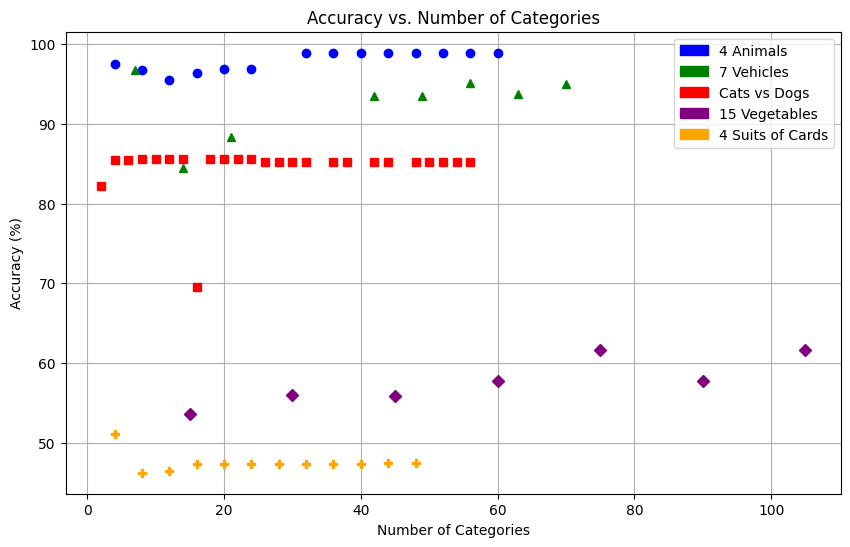

In [102]:
plt.figure(figsize=(10, 6))
plt.xlabel('Number of Categories')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs. Number of Categories')
plt.grid()
plt.legend()

#Calling function
append_accuracies(aO_counts,"Animals4", "blue", "o")
append_accuracies(v7_counts,"Vehicles7", "green", "^")
append_accuracies(cd_counts,"Cats vs Dogs", "red", "s")
append_accuracies(veg_counts,"Vegetables15", "purple", "D")
append_accuracies(card_counts,"Cards4", "orange", "P")

a4_patch = mpatches.Patch(color='blue', label='4 Animals')
v7_patch = mpatches.Patch(color='green', label='7 Vehicles')
cd_patch = mpatches.Patch(color='red', label='Cats vs Dogs')
veg_patch = mpatches.Patch(color='purple', label='15 Vegetables')
card_patch = mpatches.Patch(color='orange', label='4 Suits of Cards')


plt.legend(handles=[a4_patch, v7_patch, cd_patch, veg_patch, card_patch])

#Axis ranges

# plt.xlim(0, 80)  
# plt.ylim(0, 100)

plt.show()